# Plots for the regressors I have trained last night

OK, so there are 3 plots I have in mind that will potentially go into the final submission. I will plot them here, save on the disk and then add them to my presentation and the submission.

In [4]:
from  pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from joblib import load

from sklearn.metrics import mean_absolute_error, mean_squared_error


VECTORS_PATH = '/media/pawel/DATA/tmp/freddie_mercuries/en_face/all_vectors'
Z_SHAPE = 256


## Loading the data

In [5]:
def import_and_stack_100000_vectors():
    pathnames = sorted(Path(VECTORS_PATH).rglob('*.npy'))
    vectors = [np.load(pathname) for pathname in pathnames]
    stacked_vectors = np.vstack(vectors)
    
    assert stacked_vectors.shape == (100000, Z_SHAPE), f"stacked_vectors.shape = {stacked_vectors.shape}, but should be (100000, {Z_SHAPE})"
    
    return stacked_vectors
    
    
def get_data():
    permutation_indices = np.load("permuted_100000.npy")
    
    Z = import_and_stack_100000_vectors()
    Y = np.load("../z-to-param/data/outvec.npy")[permutation_indices]
    
    
    return Z, Y



Z, Y = get_data()
Z.shape, Y.shape

((100000, 256), (100000, 5))

In [6]:
def get_validation_and_test_data():
    VALIDATION_AND_TEST_Z_PATH = "/media/pawel/DATA/tmp/freddie_mercuries/en_face/new_vectors"
    packages_paths = [path for path in Path(VALIDATION_AND_TEST_Z_PATH).rglob('*.npy')]
    assert len(packages_paths) != 0, f"No packages found in {VALIDATION_AND_TEST_Z_PATH}"
    
    validation_range = (90, 100)
    test_range = (90, 115)
    validation_package_paths = sorted(list(packages_paths)[validation_range[0]:validation_range[1]])
    test_package_paths = sorted(list(packages_paths)[test_range[0]:test_range[1]])
    
    Z_validation = np.vstack([np.load(path) for path in validation_package_paths])
    Z_test = np.vstack([np.load(path) for path in test_package_paths])
    
    permutation_indices = np.load("permuted_100000.npy")
    Y_all = np.load("../z-to-param/data/outvec.npy")[permutation_indices]
    Y_validation = Y_all[validation_range[0]*100:validation_range[1]*100]
    Y_test = Y_all[test_range[0]*100:test_range[1]*100]
    
    return (Z_validation, Y_validation), (Z_test, Y_test)
    
(Z_val, Y_val), (Z_test, Y_test) = get_validation_and_test_data()
Z_val.shape, Y_val.shape, Z_test.shape, Y_test.shape


((1000, 256), (1000, 5), (2500, 256), (2500, 5))

In [7]:
def compute_adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def get_adj_r2(regressor, Z, Y, p=None):
    p = Z.shape[1] if p is None else p
    r2 = regressor.score(Z, Y)
    adj_r2 = compute_adjusted_r2(r2, Z.shape[0], p)
    
    return adj_r2

## Plot I
Adjusted r2 barplot for models trained on 50000 samples

In [8]:
regressors_path = Path("regressors")
plot1_regressors = {"Linear Regression": [  load(path) for path in sorted(regressors_path.rglob("LinearRegression_50000_Z*.joblib"))],
                    "Random Forest": [  load(path) for path in sorted(regressors_path.rglob("RandomForestRegressor_50000_Z*.joblib"))],
                    "SVR": [  load(path) for path in sorted(regressors_path.rglob("MultiOutputRegressor_50000_Z*.joblib"))],
                    "MLP": [  load(path) for path in sorted(regressors_path.rglob("MLPRegressor_50000_Z*.joblib"))]}

In [12]:
# ps = [16, 32, 64, 128, 256]
# results = {f"{p}": [] for p in ps}
# regressor_names = list(plot1_regressors.keys())
# for regressor_name, regressors in plot1_regressors.items():
#     print(f"{regressor_name}") 
#     # if regressor_name == "SVR":
#     #     continue
#     for regressor, p in zip(regressors, ps):
#         adjusted_r2 = get_adj_r2(regressor, Z_test, Y_test, p)
#         print(f"p={p}: {adjusted_r2}")
#         results[f"{p}"].append(adjusted_r2)



In [13]:


# x = np.arange(len(regressor_names))  # the label locations
# width = 0.13  # the width of the bars
# multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

# for attribute, measurement in results.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=5, fmt='%.2f', rotation=90)
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Adjusted R2')
# ax.set_title('Adjusted R2 by regressor and number of input dimensions')
# ax.set_xticks(x + width, regressor_names)
# ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 1)

# plt.show()


In [14]:
# ps = [16, 32, 64, 128, 256]
# results_mae = {f"{p}": [] for p in ps}
# results_mse = {f"{p}": [] for p in ps}
# for regressor_name, regressors in plot1_regressors.items():
#     print(f"{regressor_name}") 
#     for regressor, p in zip(regressors, ps):
#         Y_test_pred = regressor.predict(Z_test)
#         mae = mean_absolute_error(Y_test, Y_test_pred)
#         mse = mean_squared_error(Y_test, Y_test_pred)
#         print(f"p={p}: mae={mae:2f} mse={mse:2f}")
#         results[f"{p}"].append(mae)

In [9]:
plot1_regressors_2 = {"Linear Regression": [  load(path) for path in sorted(regressors_path.rglob("LinearRegression_60000_Z*.joblib"))],
                    "Random Forest": [  load(path) for path in sorted(regressors_path.rglob("RandomForestRegressor_60000_Z*.joblib"))],
                    "SVR": [  load(path) for path in sorted(regressors_path.rglob("MultiOutputRegressor_60000_Z*.joblib"))],
                    "MLP": [  load(path) for path in sorted(regressors_path.rglob("MLPRegressor_60000_Z*.joblib"))]}

In [16]:
ps = [16, 32, 64, 128, 256]
results_mae = {f"{p}": [] for p in ps}
results_mse = {f"{p}": [] for p in ps}
results_r2 = {f"{p}": [] for p in ps}

for regressor_name, regressors in plot1_regressors_2.items():
    print(f"{regressor_name}") 
    for regressor, p in zip(regressors, ps):
        adjusted_r2 = get_adj_r2(regressor, Z_test, Y_test, p)
        Y_test_pred = regressor.predict(Z_test)
        mae = mean_absolute_error(Y_test, Y_test_pred)
        mse = mean_squared_error(Y_test, Y_test_pred)
        print(f"p={p}: mae={mae:2f} mse={mse:2f} adj_r2: {adjusted_r2}")
        
        results_mae[f"{p}"].append(mae)
        results_mse[f"{p}"].append(mse)
        results_r2[f"{p}"].append(adjusted_r2)
        

Linear Regression
p=16: mae=37.558742 mse=2125.384156 adj_r2: 0.27358661890338487
p=32: mae=37.817280 mse=2150.100381 adj_r2: 0.26061806266483434
p=64: mae=36.303929 mse=1990.603688 adj_r2: 0.3063628409381405
p=128: mae=34.254467 mse=1818.075382 adj_r2: 0.34942683406444064
p=256: mae=20.317791 mse=779.287380 adj_r2: 0.7074972739288082
Random Forest
p=16: mae=38.218586 mse=2194.152025 adj_r2: 0.2500267479567746
p=32: mae=38.555528 mse=2233.618899 adj_r2: 0.23170950948940383
p=64: mae=38.223670 mse=2186.558036 adj_r2: 0.23798602455681062
p=128: mae=37.860660 mse=2151.012847 adj_r2: 0.23008589749693975
p=256: mae=42.021804 mse=2551.320793 adj_r2: 0.03475688998823867
SVR
p=16: mae=37.321882 mse=2119.526333 adj_r2: 0.2754421293282244
p=32: mae=37.348980 mse=2120.758412 adj_r2: 0.2703144115337177
p=64: mae=36.216489 mse=1993.908410 adj_r2: 0.30504160697983673
p=128: mae=34.917885 mse=1860.836540 adj_r2: 0.33420757143727553
p=256: mae=24.973768 mse=1037.317414 adj_r2: 0.609673271317967
MLP
p=

In [1]:
regressor_names = list(plot1_regressors_2.keys())
x = np.arange(len(regressor_names))  # the label locations
width = 0.13  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results_r2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5, fmt='%.2f', rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Adjusted R2')
ax.set_title('Adjusted R2 by regressor and number of input dimensions (trained on 60000 samples)')
ax.set_xticks(x + width, regressor_names)
ax.legend(title="Input dimension", loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()


NameError: name 'plot1_regressors_2' is not defined

In [ ]:
regressor_names = list(plot1_regressors_2.keys())
x = np.arange(len(regressor_names))  # the label locations
width = 0.13  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results_mae.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5, fmt='%.2f', rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Mean Absolute Error by regressor and number of input dimensions (trained on 60000 samples)')
ax.set_xticks(x + width, regressor_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()


In [ ]:
regressor_names = list(plot1_regressors_2.keys())
x = np.arange(len(regressor_names))  # the label locations
width = 0.13  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results_mse.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5, fmt='%.2f', rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Squared Error')
ax.set_title('Mean Squared Error by regressor and number of input dimensions (trained on 60000 samples)')
ax.set_xticks(x + width, regressor_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

## Plot II - compare regressors trained on n samples without PCA

In [22]:
linear_regressors = [  load(regressors_path / f"LinearRegression_{n}_Z.joblib") 
                     for n in range(10000, 100001, 10000)]
svr_regressors = [  load(regressors_path / f"MultiOutputRegressor_{n}_Z.joblib") for n in range(10000, 100001, 10000)]
mlp_regressors = [  load(regressors_path / f"MLPRegressor_{n}_Z.joblib") for n in range(10000, 100001, 10000)]

mlp_regressors[0].score(Z_test, Y_test)

-0.0251629939099272

In [23]:
def get_mae_mse_and_r2(regressor, Z, Y):
    Y_pred = regressor.predict(Z)
    mae = mean_absolute_error(Y, Y_pred)
    mse = mean_squared_error(Y, Y_pred)
    r2 = regressor.score(Z, Y)
    
    return mae, mse, r2


linear_regresion_results = [get_mae_mse_and_r2(regressor, Z_test, Y_test) for regressor in linear_regressors]
svr_results = [get_mae_mse_and_r2(regressor, Z_test, Y_test) for regressor in svr_regressors]
mlp_results = [get_mae_mse_and_r2(regressor, Z_test, Y_test) for regressor in mlp_regressors]


Linear Regression 10000: mae=20.83, mse=812.59, r2=0.73
Linear Regression 20000: mae=20.71, mse=805.06, r2=0.73
Linear Regression 30000: mae=20.13, mse=769.25, r2=0.74
Linear Regression 40000: mae=20.22, mse=774.47, r2=0.74
Linear Regression 50000: mae=20.29, mse=777.93, r2=0.74
Linear Regression 60000: mae=20.32, mse=779.29, r2=0.74
Linear Regression 70000: mae=20.05, mse=763.36, r2=0.74
Linear Regression 80000: mae=19.85, mse=751.77, r2=0.75
Linear Regression 90000: mae=19.76, mse=746.79, r2=0.75
Linear Regression 100000: mae=19.65, mse=741.11, r2=0.75


In [25]:

for n, (mae, mse, r2) in zip(range(10000, 100001, 10000), linear_regresion_results):
    print(f"Linear Regression {n}: mae={mae:.2f}, mse={mse:.2f}, r2={r2:.2f}")
    
for n, (mae, mse, r2) in zip(range(10000, 100001, 10000), svr_results):
    print(f"SVR {n}: mae={mae:.2f}, mse={mse:.2f}, r2={r2:.2f}")
    
for n, (mae, mse, r2) in zip(range(10000, 100001, 10000), mlp_results):
    print(f"MLP {n}: mae={mae:.2f}, mse={mse:.2f}, r2={r2:.2f}")

Linear Regression 10000: mae=20.83, mse=812.59, r2=0.73
Linear Regression 20000: mae=20.71, mse=805.06, r2=0.73
Linear Regression 30000: mae=20.13, mse=769.25, r2=0.74
Linear Regression 40000: mae=20.22, mse=774.47, r2=0.74
Linear Regression 50000: mae=20.29, mse=777.93, r2=0.74
Linear Regression 60000: mae=20.32, mse=779.29, r2=0.74
Linear Regression 70000: mae=20.05, mse=763.36, r2=0.74
Linear Regression 80000: mae=19.85, mse=751.77, r2=0.75
Linear Regression 90000: mae=19.76, mse=746.79, r2=0.75
Linear Regression 100000: mae=19.65, mse=741.11, r2=0.75
SVR 10000: mae=39.86, mse=2289.61, r2=0.22
SVR 20000: mae=35.38, mse=1830.24, r2=0.38
SVR 30000: mae=31.16, mse=1462.68, r2=0.50
SVR 40000: mae=28.39, mse=1258.87, r2=0.57
SVR 50000: mae=26.39, mse=1126.16, r2=0.62
SVR 60000: mae=24.97, mse=1037.32, r2=0.65
SVR 70000: mae=23.62, mse=952.46, r2=0.68
SVR 80000: mae=22.60, mse=891.67, r2=0.70
SVR 90000: mae=21.92, mse=852.75, r2=0.71
SVR 100000: mae=21.31, mse=820.02, r2=0.72
MLP 10000: m

In [30]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [26]:
linear_regression_mae, linear_regression_mse, linear_regression_r2 = zip(*linear_regresion_results)
svr_mae, svr_mse, svr_r2 = zip(*svr_results)
mlp_mae, mlp_mse, mlp_r2 = zip(*mlp_results)


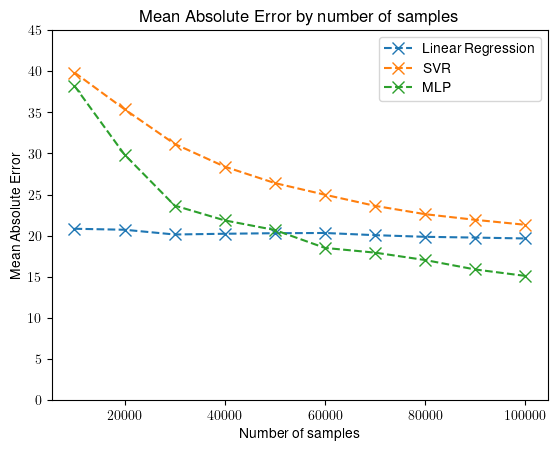

In [52]:

fig, ax = plt.subplots()
ax.plot(range(10000, 100001, 10000), linear_regression_mae, label="Linear Regression", linestyle="dashed", marker='x', markersize='8')
ax.plot(range(10000, 100001, 10000), svr_mae, label="SVR", linestyle="dashed", marker='x', markersize='8')
ax.plot(range(10000, 100001, 10000), mlp_mae, label="MLP", linestyle="dashed", marker='x', markersize='8')
ax.set_xlabel("Number of samples")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error by number of samples")
ax.set_ylim(0, 45)
ax.legend()
plt.show()

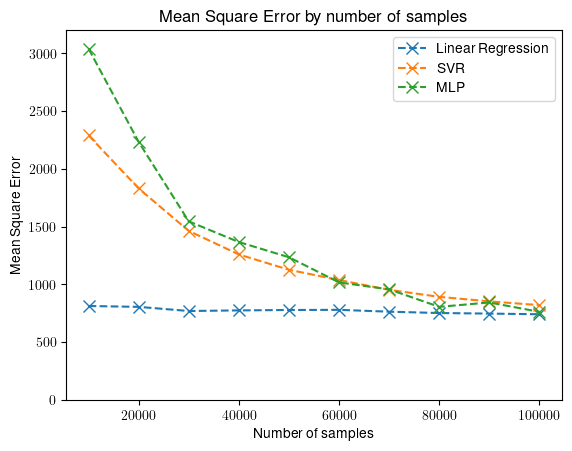

In [53]:

fig, ax = plt.subplots()
ax.plot(range(10000, 100001, 10000), linear_regression_mse, label="Linear Regression", linestyle="dashed", marker='x', markersize='8')
ax.plot(range(10000, 100001, 10000), svr_mse, label="SVR", linestyle="dashed", marker='x', markersize='8')
ax.plot(range(10000, 100001, 10000), mlp_mse, label="MLP", linestyle="dashed", marker='x', markersize='8')
ax.set_xlabel("Number of samples")
ax.set_ylabel("Mean Square Error")
ax.set_title("Mean Square Error by number of samples")
ax.set_ylim(0, 3200)
ax.legend()
plt.show()

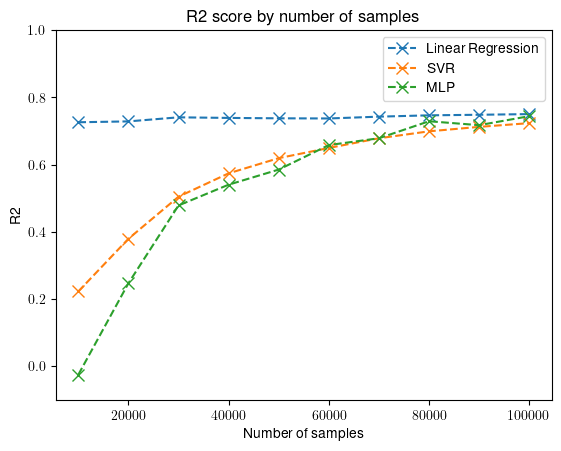

In [54]:

fig, ax = plt.subplots()
ax.plot(range(10000, 100001, 10000), linear_regression_r2, label="Linear Regression", linestyle="dashed", marker='x', markersize=8)
ax.plot(range(10000, 100001, 10000), svr_r2, label="SVR", linestyle="dashed", marker='x', markersize='8')
ax.plot(range(10000, 100001, 10000), mlp_r2, label="MLP", linestyle="dashed", marker='x', markersize='8')
ax.set_xlabel("Number of samples")
ax.set_ylabel("R2")
ax.set_ylim(-0.1, 1)
ax.set_title("R2 score by number of samples")
ax.legend()
plt.show()